### Trabalho Final da Matéria de Processamento de Imagens - BCC FURB

<b>Turma:</b> SUP-CMP.187.0.2-2024/1<br>
<b>Docente:</b> Aurélio Faustino Hoppe<br>
<b>Discentes:</b> Arthur B Pinotti, Kaue Reblin, Luiz G Klitzke<br>

In [53]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
# Parâmetros

img_height, img_width = 256, 256
path_dataset = "Images"
labels_classes = ["Habitado", "NaoHabitado"]

In [66]:
#Obtem os datasets de treino e validação através da estrutura de pastas

train_dataset, validation_dataset  = keras.utils.image_dataset_from_directory(
    path_dataset,
    labels = "inferred",
    label_mode = "int",
    class_names = labels_classes,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (img_height, img_width),
    shuffle = True,
    validation_split = 0.3, #Usa n% de dados para validação
    subset = "both",
    verbose =  True,
    seed = 1024,
)

Found 486 files belonging to 2 classes.
Using 341 files for training.
Using 145 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


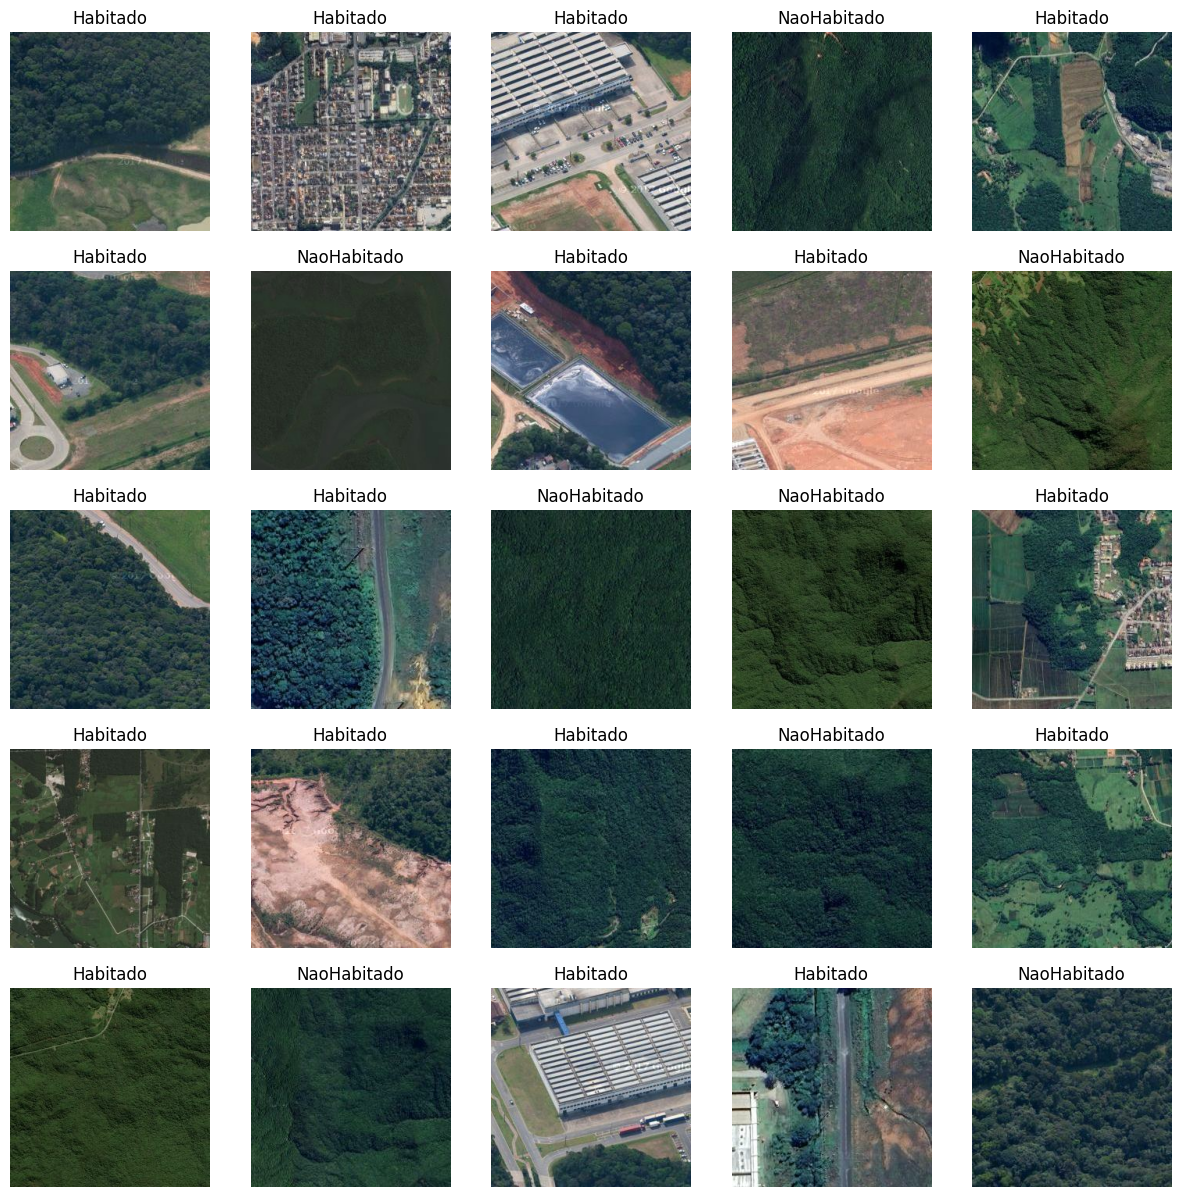

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


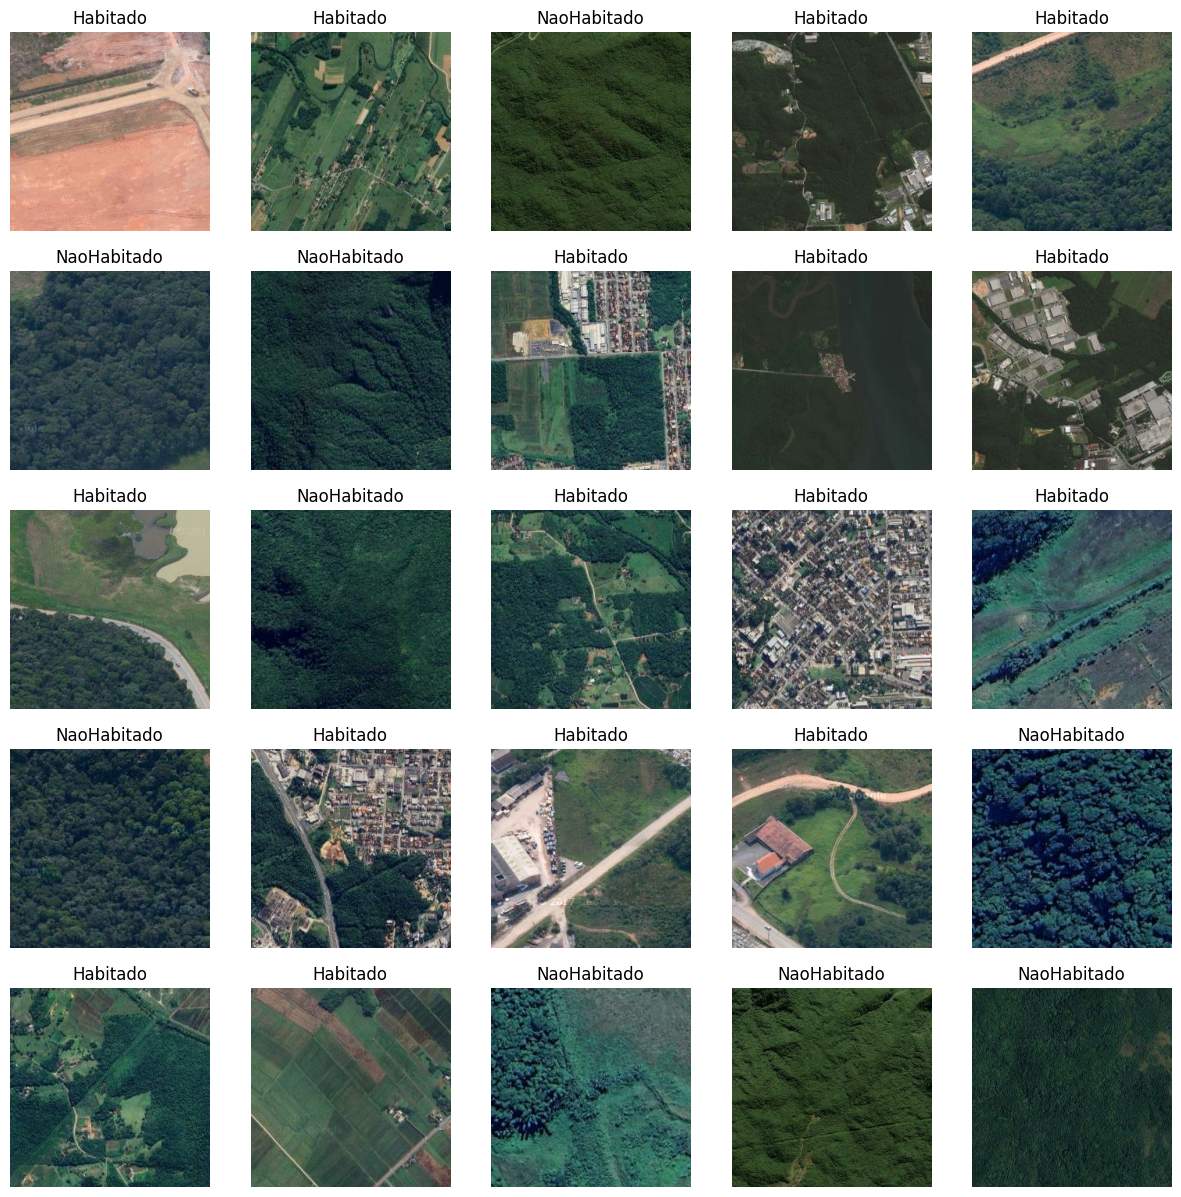

In [68]:
print (train_dataset)
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(2):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_classes[labels[i]])
        plt.axis("off")
plt.show()

print (validation_dataset)
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(2):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_classes[labels[i]])
        plt.axis("off")
plt.show()

In [69]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomZoom(0.2),
        keras.layers.RandomBrightness(0.2),
        keras.layers.RandomContrast(0.2),
    ]
)

# Modelo
cnn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn.summary()

c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,198,913 (65.61 MB)

 Trainable params: 17,198,913 (65.61 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
cnn.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Treinamento do modelo
history_cnn = cnn.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6788 - loss: 5.6836 - val_accuracy: 0.7793 - val_loss: 0.3822 - learning_rate: 1.0000e-04
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6107 - loss: 1.6125 - val_accuracy: 0.7724 - val_loss: 0.4475 - learning_rate: 1.0000e-04
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7280 - loss: 0.5534 - val_accuracy: 0.8138 - val_loss: 0.4012 - learning_rate: 1.0000e-04
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7942 - loss: 0.3998 - val_accuracy: 0.8552 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8505 - loss: 0.3212 - val_accuracy: 0.8414 - val_loss: 0.3414 - learning_rate: 1.0000e-04
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8737 - loss: 0.3013 - val_accuracy: 0.9034 - val_loss: 0.3111 - learning_rate: 1.0000e-04
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8762 - loss:

In [ ]:
# Avaliação do cnno
loss, accuracy = cnn.evaluate(validation_dataset, verbose = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.9273 - loss: 0.2353


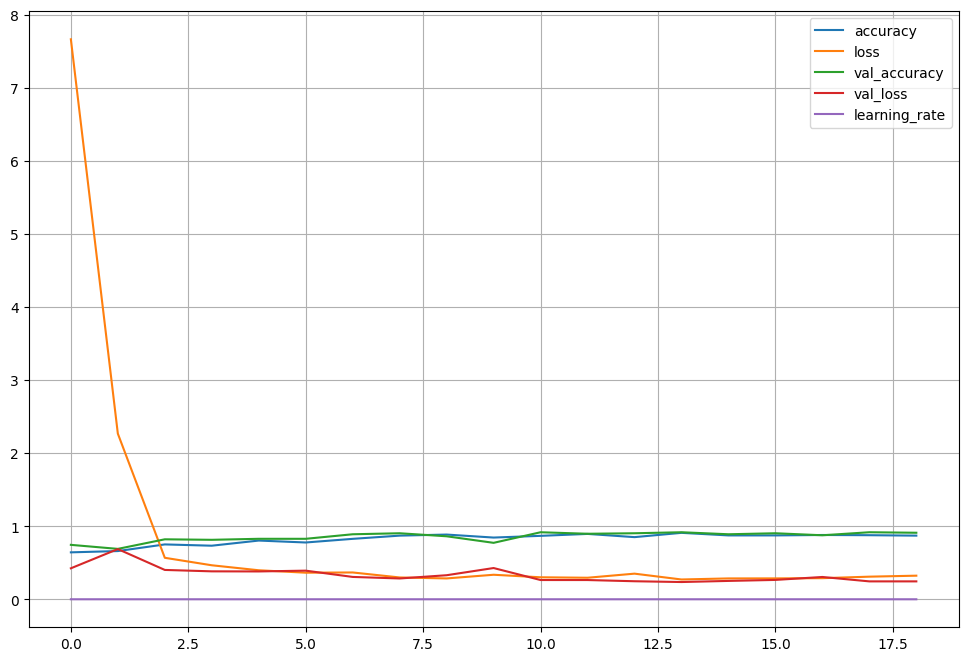

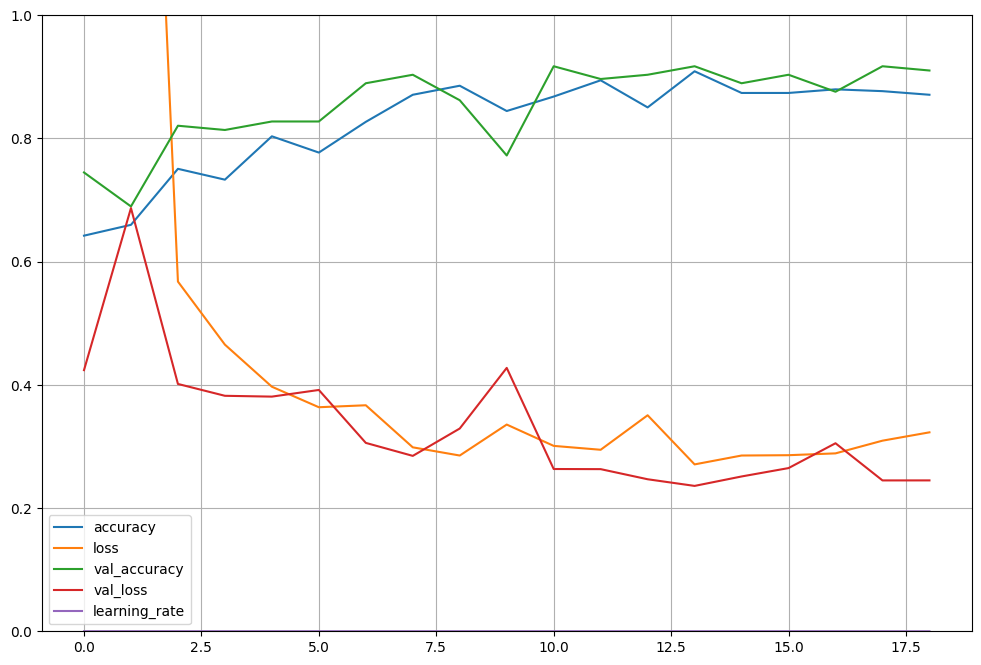

In [ ]:
#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


<Figure size 800x600 with 0 Axes>

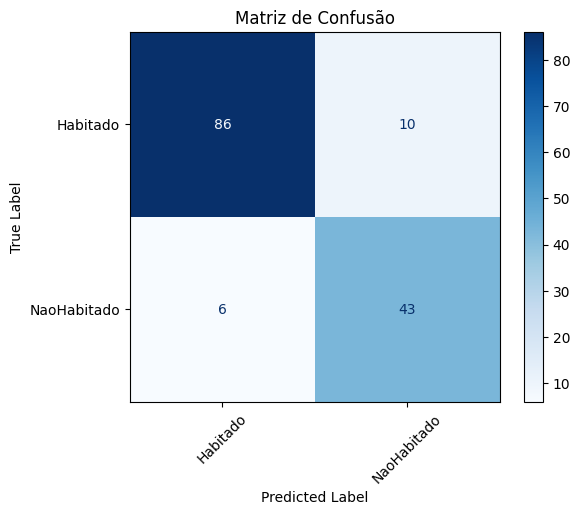

In [73]:
validation_predictions = []
true_labels = []

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


for images, labels in validation_dataset:
    predictions = cnn.predict(images)
    predictions = (predictions > 0.5).astype('int32')
    validation_predictions.extend(predictions)
    true_labels.extend(labels.numpy())


validation_predictions = np.array(validation_predictions).flatten()
true_labels = np.array(true_labels)

# Construir a matriz de confusão
cm = confusion_matrix(true_labels, validation_predictions)

# Definir as classes (nomes das classes)
classes = labels_classes

# Configurar a exibição da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='.0f')  # cmap define o esquema de cores, values_format define o formato dos valores
plt.title('Matriz de Confusão')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()